# Submit your solution to the google form (link is available in telegram channel), due to 02/05/2023 23:59 Moscow time.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train_dataset.csv')

You are asked to build a model to predict the cost of acquiring a customer, the table contains the following features:
1. Store specific information:
    - store_sales(in millions) - store_sales(in million dollars)
    - unit_sales(in millions) - unit_sales(in millions) in stores Quantity
    - Store_sqft - STORE AREA AVAILABLE IN SQFT
    - Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
    - Coffee_bar - COFFEE BAR available in store
    - Video_store - VIDEO STORE/gaming store available
    - Salad_bar - SALAD BAR available in store
    - Prepared_food - food prepared available in store
    - Florist - flower shelves available in store
2. Customer related information:
    - Total_children - TOTAL CHILDREN IN HOME
    - avg_cars_at home(approx) - avg_cars_at home(approx)
    - Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
    - Cost - COST ON ACQUIRING A CUSTOMERS in dollars
3. Information about specific product (which was bought by a customer in the store):
    - Gross_weight - gross_weight OF ITEM
    - Recyclable_package - FOOD ITEM IS recyclable_package
    - Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
    
    
![cfm](convinient_food_mart.jpg)
    
Recall, that this table contains already aggregated, anonymized, obfuscated and partially synthetic data. The dataset contains multiple rows per store, per customer, per item, but we do not have `customer_id`, `purchase_id`, `item_id`, `store_id` fields, thus making the analysis somehow limited. Though, it is ideal for our first home assignment.

---

Your goal for this home assignment is two-fold:
1. Make you comfortable with data wrangling:
    - Extract rows/columns statistics
    - Visualize the dependencies
    - Gain some insights
2. Build a simple, but correct and full machine learning pipeline
    - Select proper performance metrics
    - Split the data into train and test subsets
    - Run a k-fold cross-validation on a training part to select optimal hyperparameters of the model
    - Train a model with optimal hyperparameters on the whole train set
    - Make a predictions on test set
    - Analyse the generalizability of the model by comparing its performance on train and test sets
    - Comment on whether the resulting model is "good" or "bad" from business point of view

# Analyze general data information

## Question 0. What is the goal of this dataset?

In [ ]:
df.head(3)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20


## Question 1. How many observations are in the dataset?

In [ ]:
df.shape[0]

51363

## Question 2. How many features are in the dataset? (excluding `target` column)

In [ ]:
df.shape[1] - 1

15

## Question 3. What is the difference between numerical and categorical features?

Which of the following best describes the difference between categorical and numerical features in machine learning?

Categorical features represent distinct categories or labels with no inherent numerical order, while numerical features represent measurable quantities with numerical values.

## Question 4. How many numerical and categorical features are in the dataset?  (excluding `target` column)

In [ ]:
df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
df.dtypes

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

8 -  numerical
7 - categorical
numerical: 
1)store_sales(in millions)
2)unit_sales(in millions)
3)total_children
4)num_children_at_home 
5)avg_cars_at home(approx)
6)gross_weight
7)units_per_case
8)store_sqf

categorical: 
1)recyclable_package
2)low_fat
3)coffee_bar
4)video_store
5)salad_bar
6)prepared_food
7)florist

# Analyze store specific information

## In most cases stores which have a Coffee bar, do prepare food

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

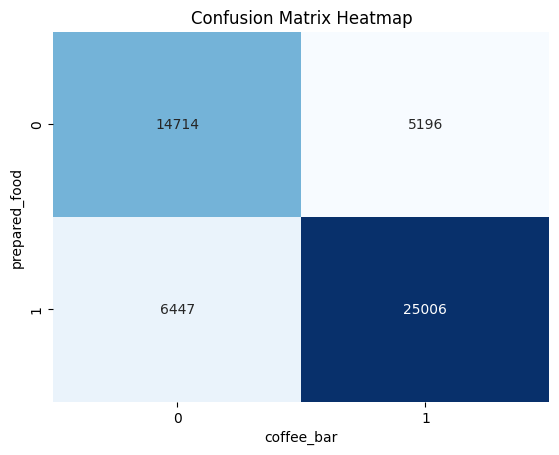

In [ ]:
# Compute a confusion matrix
cm = confusion_matrix(df['coffee_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('coffee_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap');

## Question 5. How many stores which have a Salad bar do prepare food?

Based on your answer decide if you need to drop one of the (duplicated) columns.

In [ ]:
df[(df['salad_bar'] == 1) & (df['prepared_food'] == 1)].shape[0]

30202

## Having a Coffee bar decreases the average media campaign cost

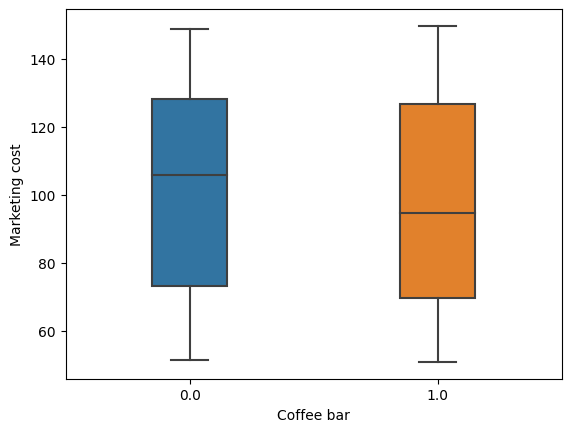

In [ ]:
sns.boxplot(data=df, x='coffee_bar', y='cost', width=.3)
plt.xlabel('Coffee bar')
plt.ylabel('Marketing cost');

In [ ]:
df.groupby('coffee_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
coffee_bar,,,
0.0,101.659804,105.74,30.162547
1.0,97.850422,94.79,29.841456


## Question 6. Does having a video store, a salad bar, an option to buy prepared food or a	florist decreases the average cost of media campaign?

In [ ]:
df.groupby('video_store')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
video_store,,,
0.0,101.781734,101.84,30.035569
1.0,94.843250,92.57,29.479086


In [ ]:
df.groupby('salad_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
salad_bar,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


In [ ]:
df.groupby('prepared_food')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
prepared_food,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


In [ ]:
df.groupby('florist')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
florist,,,
0.0,102.373140,105.74,29.258121
1.0,96.951385,94.79,30.396434


Every additinal service decreases the cost of media campaign

## Most of the stores have under 15 mln sales, with 90% of sales being under 12 mln.

The distribution is right-skewed (positive skew), with mean around 6.5mln.

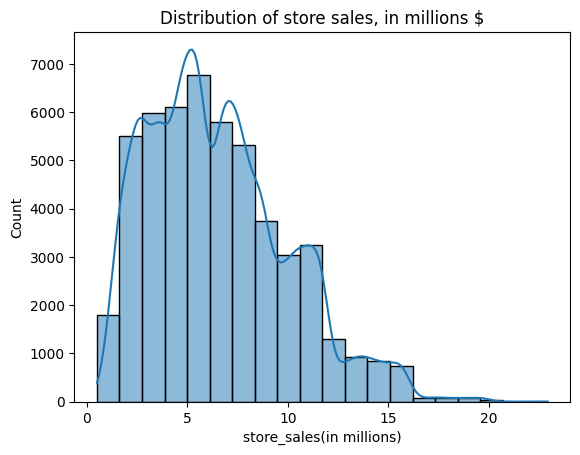

In [ ]:
sns.histplot(df['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [ ]:
df['store_sales(in millions)'].quantile(0.93)

11.85

In [ ]:
df['store_sales(in millions)'].mean()

6.531791562019353

## Question 7. What could you say about distribution of marketing costs?


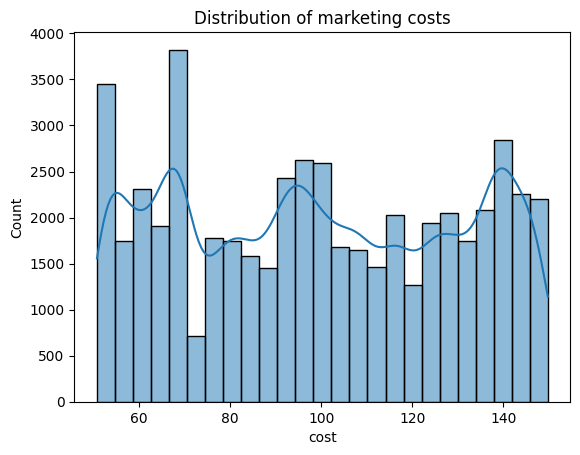

In [106]:
sns.histplot(df['cost'], kde=True, bins=25)
plt.title(f'Distribution of marketing costs')
plt.show()

In [99]:
description = df.describe()
display(description['store_sales(in millions)'])

count    51363.000000
mean         6.531792
std          3.464902
min          0.510000
25%          3.800000
50%          5.940000
75%          8.640000
max         22.920000
Name: store_sales(in millions), dtype: float64

In [100]:
display(description['cost'])

count    51363.000000
mean        99.327064
std         30.023458
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64

Histogram looks more like uniform distribution than any other provided distribution

## Question 8. What percentage of sales go into marketing cost?

Assuming that all rows with the same `store_sales(in millions)` come from the same store, and that all rows are from unique customers, the total sales are $7979 \text{mln}, \$ $, and the total costs are $5101736\$$.


In [101]:
df['store_sales(in millions)'].unique().sum()

7979.009999999999

In [102]:
df['cost'].sum()

5101736.01

In [103]:
percentage = (df['cost'].sum()/(df['store_sales(in millions)'].unique().sum()*1000000)) * 100
percentage

0.06393946128655059

0,06%

## Here is a plot of sales vs store area

It seems that while there is no clear dependence (stores with the largest sales vary in the square foot area a lot), 
there are some obvious clusters, e.g. stores with about 25000 square feet area and sales between 3 and 7 mln.

<ipython-input-107-2c8531bf5be0>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',


<Axes: xlabel='store_sales(in millions)', ylabel='store_sqft'>

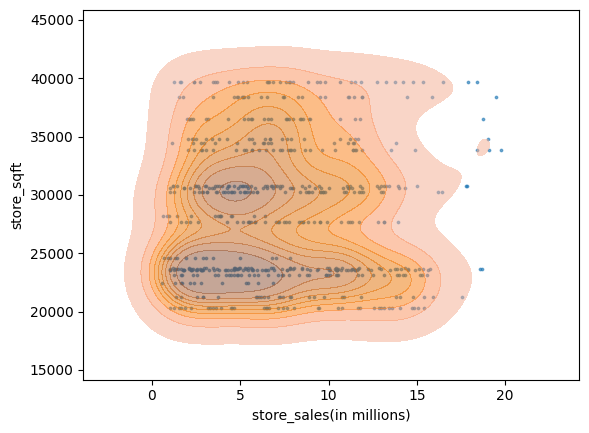

In [107]:
sub = df[['store_sales(in millions)','store_sqft']].drop_duplicates()
sub = sub[::20]

plt.scatter(sub['store_sales(in millions)'], sub['store_sqft'], s=3, alpha=0.6)

sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',
            palette="deep", alpha=0.5, levels=10, fill=True)

## Question 9. What is the average sales per squre foot area?

In [110]:
((df['store_sales(in millions)'] * 1_000_000) / df['store_sqft']).mean()

242.84208032679894

## Interestingly, the marketing costs in  stores with >=10 mln sales is not much different from the costs in stores with lower <10mln sales

In [111]:
df[df['store_sales(in millions)'] >= 10]['cost'].mean()

99.60226463674017

In [112]:
df[df['store_sales(in millions)'] < 10]['cost'].mean()

99.26912514730145

## Question 10. Is there any dependence between size of the store in square feet and the cost of marketing?

Select all that apply


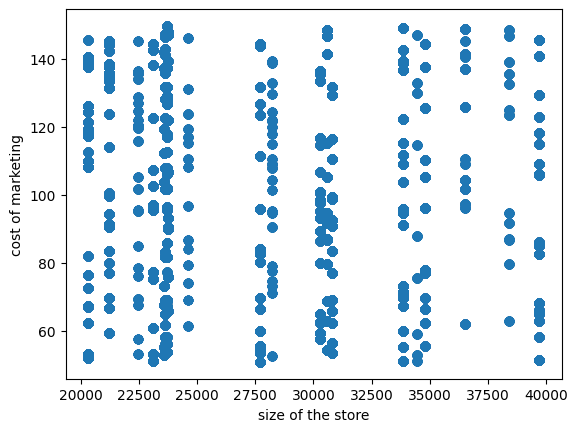

In [113]:
plt.scatter(df['store_sqft'], df['cost'])
plt.xlabel('size of the store')
plt.ylabel('cost of marketing')
plt.show()

The difference in marketing costs between small and large stores is negligble (<2%)

## Let's investigate the stores with the smallest cost to aqcuire a customers

In [114]:
df.cost.min()

50.79

In [115]:
sub = df.query('cost==50.79')

In [116]:
store_columns = [
    'store_sales(in millions)','unit_sales(in millions)',
    'store_sqft','coffee_bar','video_store',
    'salad_bar','prepared_food','florist'
]

First, these are mostly small stores with sales under 10mln

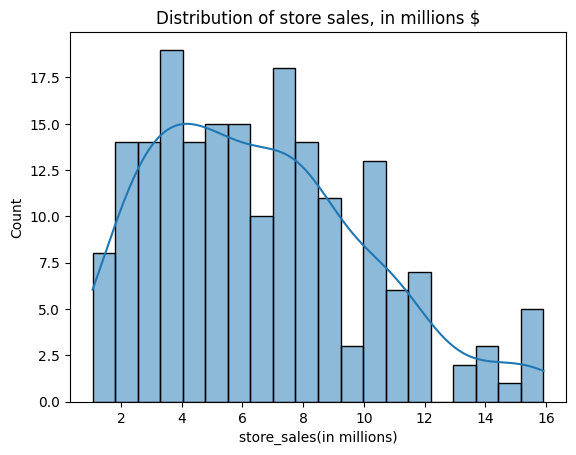

In [117]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [118]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(27694.0, 0.0)

In [119]:
sub['store_sqft'].unique()

array([27694.])

Second, it seems they all have **all** additional services

In [120]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


## What about stores with the largest cost to aqcuire a customers?

In [121]:
df.cost.max()

149.75

In [122]:
sub = df.query('cost==149.75')

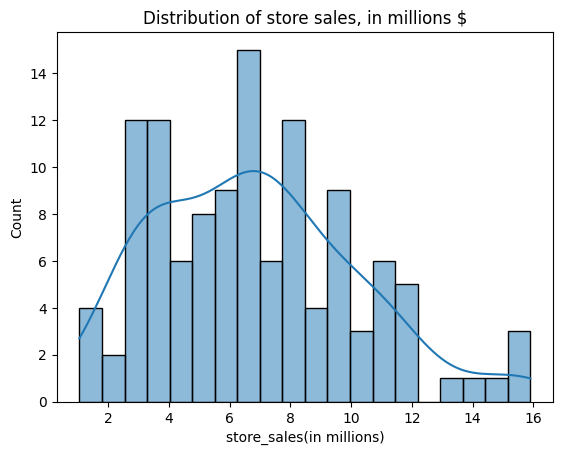

In [123]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [124]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(23688.0, 0.0)

In [125]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


They are also mostly small stores with under 10mln sales and all services included. It seems that the difference is not explained by the stores. Could it be explained by customers?

## Question 10. Do distribution of number of kids vary for the lowest cost and largest cost rows?

1. Try using `countplot` instead of `histplot`.
2. Use total number of kids (instead of kids at home)

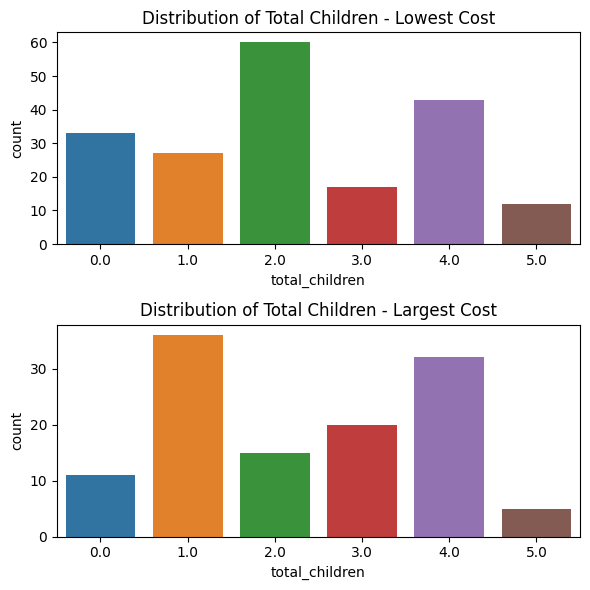

In [127]:
lowest_cost_rows = df[df['cost'] == df['cost'].min()]
largest_cost_rows = df[df['cost'] == df['cost'].max()]

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

sns.countplot(x='total_children', data=lowest_cost_rows, ax=axes[0])
axes[0].set_title('Distribution of Total Children - Lowest Cost')

sns.countplot(x='total_children', data=largest_cost_rows, ax=axes[1])
axes[1].set_title('Distribution of Total Children - Largest Cost')

plt.tight_layout()
plt.show()

Amongst the most expensive families to attract, most have 1 kid


Amongst the least expensive families to attract, most have 2 kids

## Feel free to investigate other features

# Build Machine Learning pipeline

- What are the proper performance metrics for this task?
- Compare cross-validation performance of 5 ML models
- Compute models' performance on test set
- Analyse the generalizability of the model by comparing its performance on train and test sets
- Comment on whether the resulting model is "good" or "bad" from business point of view

## Question 11. What are the proper performance metrics for this task?


Since this task is a regression problem, RMSLE and MAE are the most suitable metrics

## Split your data into Train and Test subsets using `train_test_split`, use 70% to 30% ratio for train and test.

## Question 12.  How many observations are in your `train` set?


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('cost', axis=1) 
y = df['cost']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
num_observations_train = X_train.shape[0]
print("number of observations in a train set:", num_observations_train)

35954

## We will compare the performance of 5 ML models:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Gradient Boosting

## Question 13. Which of the models require feature standartization?


KNN and Linear regression

## We will use `GridSearchCV` method to run 5 fold cross-validation and select models' hyperparameters

see example below (on Iris dataset)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [131]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', refit=True)
clf.fit(iris.data, iris.target)
print(clf.best_score_)

0.9800000000000001


## Explore hyperparameters of different ML models

## Question 14. What does `fit_intercept` parameter responcible for in Linear Regression?


In [132]:
from sklearn.linear_model import LinearRegression

Determines if a constant term should be included in the model


Train Linear Regression model using GridSearchCV, compare models with `fit_intercept=True` and `fit_intercept=False` 

In [133]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
scoring = {
    'neg_MAE':'neg_mean_absolute_error' ,
    'neg_MSE':'neg_mean_squared_error',
}

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

param_grid = {'fit_intercept': [True, False]}

lin_reg = LinearRegression()
lreg = GridSearchCV(lin_reg, param_grid, cv=5, scoring = scoring, refit = "neg_MAE")
lreg.fit(X_train_scaled, y_train)
print('Best parameters:', lreg.best_params_)
print('best MAE:', -lreg.best_score_)
print('best MSE:', -lreg.cv_results_['mean_test_neg_MSE'][lreg.best_index_])

Best parameters: {'fit_intercept': True}
best MAE: 25.67286857755706
best MSE: 884.3993219353003


## Question 15. What does `max_depth` and `min_samples_split` responcible for in Decision Tree Regressor?


In [135]:
from sklearn.tree import DecisionTreeRegressor

max_depth controls the maximum depth of the tree and min_samples_split specifies the minimum number of samples required to split an internal node

Train Decision Tree Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `min_samples_split`) values for search.

In [136]:
tree_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 7, 9],
    'min_samples_split': [2, 10, 20, 50, 100, 500, 1000, 10000]
}

treereg = GridSearchCV(tree_reg, param_grid, cv=5, scoring=scoring, refit='neg_MAE')
treereg.fit(X_train, y_train)

print("Best model:", treereg.best_estimator_)
print('Best parameters:', treereg.best_params_)
print('Best MAE:', -treereg.best_score_)
print('Best MSE:', -treereg.cv_results_['mean_test_neg_MSE'][treereg.best_index_])

Best model: DecisionTreeRegressor(max_depth=3, random_state=42)
Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best MAE: 25.13782795603135
Best MSE: 865.2487868481019


## Question 16. What does `n_estimators` and `max_depth` responcible for in Random Forest Regressor?


In [137]:
from sklearn.ensemble import RandomForestRegressor

n_estimators controls the number of trees in the forest and max_depth determines the maximum depth of each tree

In [ ]:
rf_reg = RandomForestRegressor(random_state=27)
param_grid = {
    'max_depth': [10, 15, 20],
    'n_estimators': [50, 100, 200]
}
rf = GridSearchCV(rf_reg, param_grid, cv=5, scoring=scoring, refit='neg_MAE')
rf.fit(X_train, y_train)
print("Best model:", rf.best_estimator_)
print('Best parameters:', rf.best_params_)
print('Best MAE:', -rf.best_score_)
print('Best MSE:', -rf.cv_results_['mean_test_neg_MSE'][rf.best_index_])

Best model: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=27)
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best MAE: 25.033159431629258
Best MSE: 845.9750281065744


Train Random Forest Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `n_estimators`) values for search.


## Question 17. What does `n_neighbors` responcible for in K Neighbors Regressor?


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors controls the number of neighbors to include in the majority of the voting process

In [ ]:
knn_reg = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [5, 10, 25, 50]
}
knn = GridSearchCV(knn_reg, param_grid, cv=5, scoring=scoring, refit='neg_MAE')
knn.fit(X_train_scaled, y_train)
print("Best model:", knn.best_estimator_)
print('Best parameters:', knn.best_params_)
print('Best MAE:', -knn.best_score_)
print('Best MSE:', -knn.cv_results_['mean_test_neg_MSE'][knn.best_index_])

NameError: ignored

Train KNeighborsRegressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameter `n_neighbors` values for search.

## Question 18. How `n_neighbors` affects KNN performance?


n_neighbors influences the model's balance between bias and variance, with a small value leading to low bias and high variance, and a large value leading to high bias and low variance


In [ ]:
#knn.cv_results_

## Question 19. How `learning_rate` and `n_estimators` affect Gradient Boosting Regressor performance?


learning_rate adjusts the contribution of each tree to the overall prediction, and n_estimators controls the number of trees in the ensemble, both affecting the model's balance between bias and variance

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=27)
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
gb = GridSearchCV(gb_reg, param_grid, cv=5, scoring=scoring, refit='neg_MAE')
gb.fit(X_train, y_train)

print("Best model:", gb.best_estimator_)
print('Best parameters:', gb.best_params_)
print('Best MAE:', -gb.best_score_)
print('Best MSE:', -gb.cv_results_['mean_test_neg_MSE'][gb.best_index_])

Train Gradient Boosting Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters `learning_rate`, `n_estimators` and `max_depth` values for search. 

## Question 20. Test 5 ML models performance on Test set, which model perform the best?


- Linear Regression
- Decision Tree
- Random Forest
- KNN
- Gradient Boosting


In [ ]:

lreg_predictions = lreg.best_estimator_.predict(X_test_scaled)
lreg_mse = mean_squared_error(y_test, lreg_predictions)
lreg_mae = mean_absolute_error(y_test, lreg_predictions)

treereg_predictions = treereg.best_estimator_.predict(X_test)
treereg_mse = mean_squared_error(y_test, treereg_predictions)
treereg_mae = mean_absolute_error(y_test, treereg_predictions)

rf_predictions = rf.best_estimator_.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

knn_predictions = knn.best_estimator_.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

gb_predictions = gb.best_estimator_.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

from tabulate import tabulate
models = [
    ("Linear Regression", lreg_predictions, lreg_mae, lreg_mse),
    ("Decision Tree Regressor", treereg_predictions, treereg_mae, treereg_mse),
    ("Random Forest", rf_predictions, rf_mae, rf_mse),
    ("KNN", knn_predictions, knn_mae, knn_mse),
    ("Gradient Boosting", gb_predictions, gb_mae, gb_mse)
]

table_rows = []

for model_name, predictions, mae, mse in models:
    table_rows.append([model_name, mae, mse])
table_header = ["Model", "MAE", "MSE"]
print(tabulate(table_rows, headers=table_header, tablefmt="grid"))

## Question 21. What is the `MAE` of the best perfroming model? (report `MAE` with 2 decimal places)

In [ ]:
print("Random Forest {:.2f}".format(rf_mae))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Import data from URL
url = "https://raw.githubusercontent.com/kurmukovai/ds-for-business/main/home-assignment-1/train_dataset.csv"
data = pd.read_csv(url)

# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models on training set
lr_model.fit(train_data.drop(columns=['target']), train_data['target'])
dt_model.fit(train_data.drop(columns=['target']), train_data['target'])
rf_model.fit(train_data.drop(columns=['target']), train_data['target'])
knn_model.fit(train_data.drop(columns=['target']), train_data['target'])
gb_model.fit(train_data.drop(columns=['target']), train_data['target'])

# Make predictions on test set
lr_preds = lr_model.predict(test_data.drop(columns=['target']))
dt_preds = dt_model.predict(test_data.drop(columns=['target']))
rf_preds = rf_model.predict(test_data.drop(columns=['target']))
knn_preds = knn_model.predict(test_data.drop(columns=['target']))
gb_preds = gb_model.predict(test_data.drop(columns=['target']))

# Calculate MAE for each model
lr_mae = mean_absolute_error(test_data['target'], lr_preds)
dt_mae = mean_absolute_error(test_data['target'], dt_preds)
rf_mae = mean_absolute_error(test_data['target'], rf_preds)
knn_mae = mean_absolute_error(test_data['target'], knn_preds)
gb_mae = mean_absolute_error(test_data['target'], gb_preds)

# Print MAE for each model
print("Linear Regression MAE:", round(lr_mae, 2))
print("Decision Tree MAE:", round(dt_mae, 2))
print("Random Forest MAE:", round(rf_mae, 2))
print("KNN MAE:", round(knn_mae, 2))
print("Gradient Boosting MAE:", round(gb_mae, 2))

## Question 22. Comment on whether the resulting model is "good" or "bad" from business point of view, given that the mean cost is 99$

In [ ]:
import numpy as np
print("Random Forest:",np.mean(rf_predictions))

good

## Upload your Jupyter Notebook or Orange project.